<a id='top' ></a>
**目录**
1. [keras简介](#review)
    - 什么是keras？
    - 设计原则
    - 安装
    - 不同后端的切换
2. [基本概念](#concept)
    - 符号计算
    - 张量
    - 输入数据的格式
    - 梯度下降
3. [keras模型](#model)
    - Sequential
    - Model
4. [keras层](#layers)
    - Dense层
    - Activation层
    - Dropout层
    - Flatten层
    - convolutional层
    - pooling层
    - Recurrent层
    - Embedding层
5. [keras网络配置](#equipment)
    - 损失函数
    - 优化器
    - 激活函数
    - 性能评估
    - 初始化方法
    - 正则化
6. [keras预训练模型](#pretrain)
    - ```InceptionV3, MobileNet, ResNet50, VGG16, VGG19, Xception```
7. [keras常用数据库](#dataset)
    - CIFAR10 小图片分类数据集
    - CIFAR100 小图片分类数据集
    - IMDB影评倾向分类
    - 路透社新闻主题分类
    - MNIST手写数字识别
    - Boston房屋价格回归数据集
8. [keras可视化](#visualization)
9. [keras练习](#Exercise)

<a id='review' ></a>
## keras简介

### Keras是什么？
**Keras**是一个高层神经网络API，Keras由纯Python编写而成并基Tensorflow、Theano以及CNTK后端。Keras 为支持快速实验而生，能够把你的idea迅速转换为结果。

### Keras的设计原则： 
- 用户友好：Keras是为人类而不是外星人设计的API。用户的使用体验是keras考虑的首要和中心内容。Keras遵循减少认知困难的最佳实践：Keras提供一致而简洁的API， 能够极大减少一般应用下用户的工作量，同时，Keras提供清晰和具有实践意义的bug反馈。  

- 模块性：模型可理解为一个层的序列或数据的运算图，完全可配置的模块可以用最少的代价自由组合在一起。具体而言，网络层、损失函数、优化器、初始化策略、激活函数、正则化方法都是独立的模块，你可以使用它们来构建自己的模型。  

- 易扩展性：添加新模块超级容易，只需要仿照现有的模块编写新的类或函数即可。创建新模块的便利性使得Keras更适合于先进的研究工作。

### keras 依赖包
**Keras**使用了下面的依赖包，三种后端（Tensorflow、Theano、CNTK）必须至少选择一种，这个教程我们选择tensorflow。  
- numpy，scipy  
- pyyaml  
- HDF5, h5py（可选，仅在模型的save/load函数中使用）  

### Keras后端
**Keras**提供了三种后端引擎Theano/Tensorflow/CNTK，并将其函数统一封装，使得用户可以以同一个接口调用不同后端引擎的函数。  
- Theano是一个开源的符号主义张量操作框架，由蒙特利尔大学LISA/MILA实验室开发。
- TensorFlow是一个符号主义的张量操作框架，由Google开发。
- CNTK是一个由微软开发的商业级工具包。  

**Keras切换后端**  
-  通过修改配置文件keras.json  
默认是:
```json
{
    "image_data_format": "channels_last",
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "tensorflow"
}```  
修改后：  
```json
{
    "image_data_format": "channels_first",
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "theano"
}```  

[Back to top](#top)

<a id='concept' ></a>
## 基本概念

### 符号计算 

符号主义的计算首先定义各种变量，然后建立一个“计算图”，计算图规定了各个变量之间的计算关系。建立好的计算图需要编译以确定其内部细节，然而，此时的计算图还是一个“空壳子”，里面没有任何实际的数据，只有当你把需要运算的输入放进去后，才能在整个模型中形成数据流，从而形成输出值。 

Keras的模型搭建形式就是这种方法，在你搭建Keras模型完毕后，你的模型就是一个空壳子，只有实际生成可调用的函数后（K.function），输入数据，才会形成真正的数据流。

使用计算图的语言，如Theano，以难以调试而闻名，当Keras的Debug进入Theano这个层次时，往往也令人头痛。没有经验的开发者很难直观的感受到计算图到底在干些什么。尽管很让人头痛，但大多数的深度学习框架使用的都是符号计算这一套方法，因为符号计算能够提供关键的计算优化、自动求导等功能。  
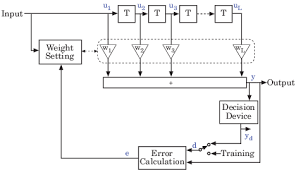

### 张量 

张量可以看作是向量、矩阵的自然推广，我们用张量来表示广泛的数据类型。  

规模最小的张量是0阶张量，即标量，也就是一个数。当我们把一些数有序的排列起来，就形成了1阶张量，也就是一个向量。如果我们继续把一组向量有序的排列起来，就形成了2阶张量，也就是一个矩阵。把矩阵摞起来，就是3阶张量，我们可以称为一个立方体，具有3个颜色通道的彩色图片就是一个这样的立方体。  
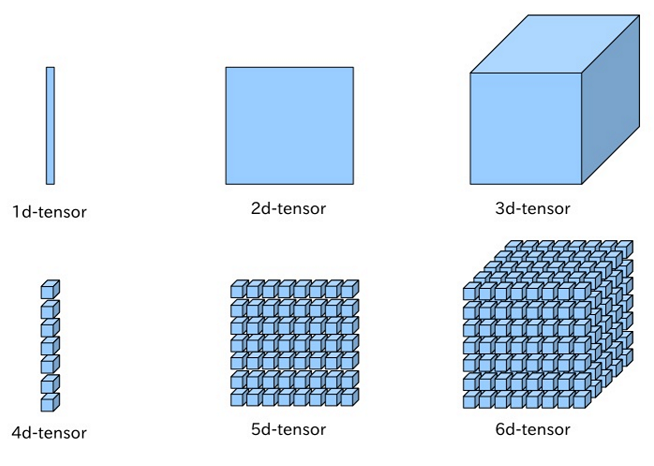

### 输入数据的格式

在如何表示一组彩色图片的问题上，Theano和TensorFlow发生了分歧，Theano模式会把100张RGB三通道的16×32（高为16宽为32）彩色图表示为下面这种形式```（100,3,16,32）```。第0个维度是样本维，代表样本的数目，第1个维度是通道维，代表颜色通道数。后面两个就是高和宽了。这种theano风格的数据组织方法，称为“channels_first”，即通道维靠前。  

而TensorFlow，的表达形式是```（100,16,32,3）```，即把通道维放在了最后，这种数据组织方式称为“channels_last”。


### 梯度下降

深度学习的优化算法，基本上都是建立在梯度下降的基础之上。每次的参数更新有两种方式。

第一种，遍历全部数据集算一次损失函数，然后算函数对各个参数的梯度，更新梯度。这种方法每更新一次参数都要把数据集里的所有样本都看一遍，计算量开销大，计算速度慢，不支持在线学习，这称为Batch gradient descent，批梯度下降。

另一种，每看一个数据就算一下损失函数，然后求梯度更新参数，这个称为随机梯度下降，stochastic gradient descent。这个方法速度比较快，但是收敛性能不太好，可能在最优点附近晃来晃去，get不到最优点。两次参数的更新也有可能互相抵消掉，造成目标函数震荡的比较剧烈。

为了克服两种方法的缺点，现在一般采用的是一种折中手段，mini-batch gradient decent，小批的梯度下降，这种方法把数据分为若干个批，按批来更新参数，这样，一个批中的一组数据共同决定了本次梯度的方向，下降起来就不容易跑偏，减少了随机性。另一方面因为批的样本数与整个数据集相比小了很多，计算量也不是很大。

基本上现在的梯度下降都是基于mini-batch的，所以Keras的模块中经常会出现**batch_size**，就是指这个。  
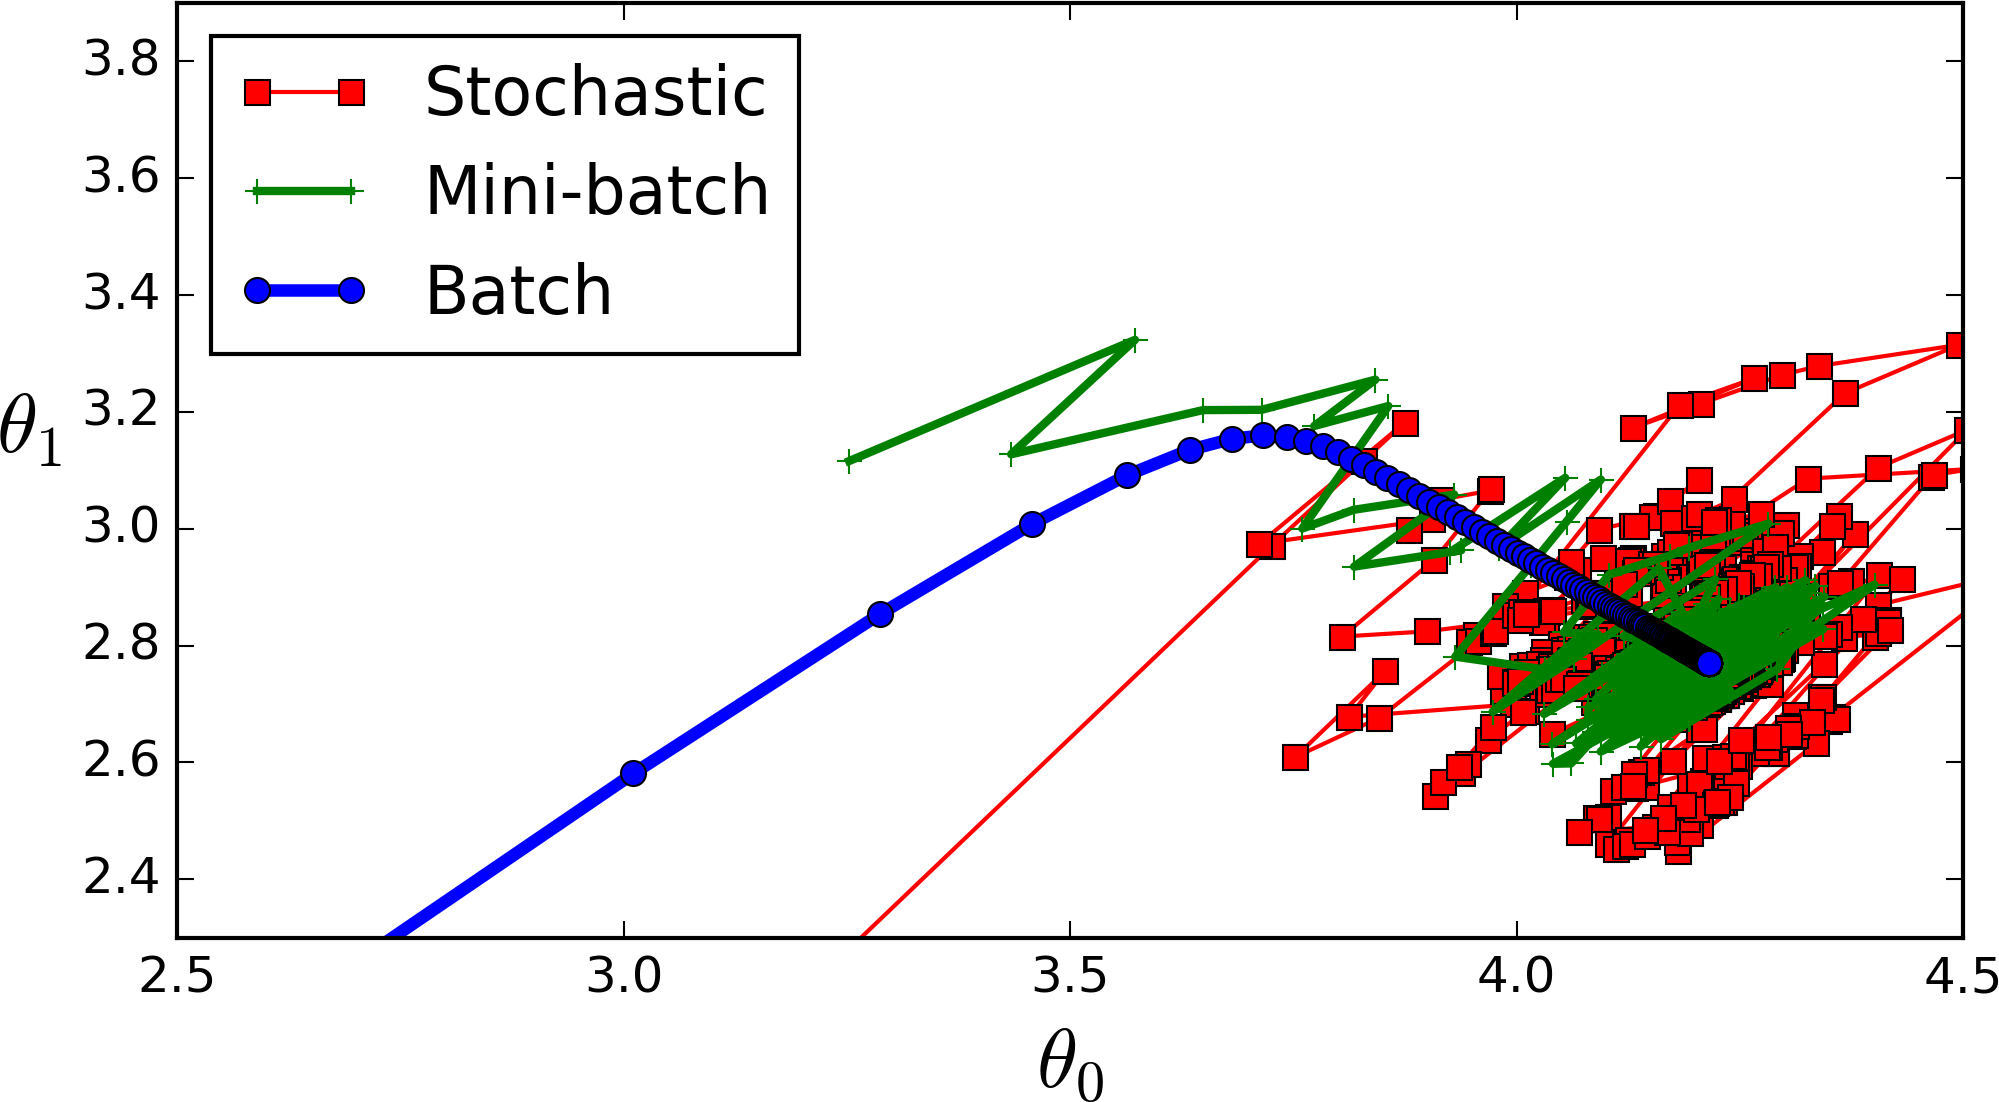

[Back to top](#top)

<a id='model' ></a>
## keras模型

**Keras**有两种类型的模型，**Sequential** 和 **Model** ，Model应用更为广泛，Sequential 是函数式模型的一种特殊情况。  
模型经常用到的方法：  
- ```model.summary()```：打印出模型概况
- ```model.get_layer()```：依据层名或下标获得层对象
- ```model.get_weights()```：返回模型权重张量的列表，类型为numpy array
- ```model.set_weights()```：从numpy array里将权重载入给模型，要求数组具有与model.get_weights()相同的形状。
- ```model.to_json```：返回代表模型的JSON字符串，仅包含网络结构，不包含权值。可以从JSON字符串中重构原模型：  
- ```model.to_yaml```：与```model.to_json```类似，同样可以从产生的YAML字符串中重构模型
- ```model.save_weights(filepath)```：将模型权重保存到指定路径，文件类型是HDF5（后缀是.h5）
- ```model.load_weights(filepath, by_name=False)```：从HDF5文件中加载权重到当前模型中, 默认情况下模型的结构将保持不变。如果想将权重载入不同的模型（有些层相同）中，则设置by_name=True，只有名字匹配的层才会载入权重。

### Sequential  


**Keras**的核心数据结构是“模型”，模型是一种组织网络层的方式。  

Keras中主要的模型是Sequential模型，Sequential是一系列网络层按顺序构成的栈。也可以查看函数式模型来学习建立更复杂的模型  

**Sequential模型**如下：  

In [1]:
import keras

Using TensorFlow backend.
/Users/creekee/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
dir(keras.layers)

['Activation',
 'ActivityRegularization',
 'Add',
 'AlphaDropout',
 'AtrousConv1D',
 'AtrousConv2D',
 'AtrousConvolution1D',
 'AtrousConvolution2D',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'ConvRecurrent2D',
 'Convolution1D',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CuDNNGRU',
 'CuDNNLSTM',
 'Deconv2D',
 'Deconv3D',
 'Deconvolution2D',
 'Deconvolution3D',
 'Dense',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPool2D',
 'GlobalMaxPool3D',
 'GlobalMaxPooling1D',
 'Gl

```python
from keras.models import Sequential
model = Sequential()
 
from keras.layers import Dense, Activation

model.add(Dense(units=64, input_dim=100, activation = 'relu'))
# model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))
```  
完成模型的搭建后，我们需要使用```.compile()```方法来编译模型：  

```
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
```  

编译模型时必须指明损失函数和优化器，如果需要的话，也可以自己定制损失函数。  

Keras的一个核心理念就是简明易用同时，保证用户对Keras的绝对控制力度，用户可以根据自己的需要定制自己的模型、网络层，甚至修改源代码。  
```python
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
```
```python
# 在训练数据上按batch进行一定次数的迭代来训练网络   
model.fit(x_train, y_train, epochs=5, batch_size=32) 
```
随后，我们可以使用一行代码对我们的模型进行评估，看看模型的指标是否满足我们的要求：  
```
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
```

In [3]:
from keras.models import Sequential

In [4]:
Sequential?

### Model  

层对象接受张量为参数，返回一个张量。  

输入是张量，输出也是张量的一个框架，就是一个模型，通过Model定义。这样的模型可以被像Keras的Sequential一样被训练。  

利用函数式模型的接口，我们可以很容易的重用已经训练好的模型：你可以把模型当作一个层一样，通过提供一个tensor来调用它。注意当你调用一个模型时，你不仅仅重用了它的结构，也重用了它的权重。  

使用Model模型的一个典型场景是搭建多输入、多输出的模型。

```python
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

# 定义主要输入数据的大小
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# 创建Embedding层，并将一个张量作为参数传给它
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# 创建LSTM层，并将一个张量作为参数传给它
lstm_out = LSTM(32)(x)

# 创建额外输出层
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

# 创建额外输入层
auxiliary_input = Input(shape=(5,), name='aux_input')

# 将main_input的输出和额外输入作为合并作为新的输入
x = keras.layers.concatenate([lstm_out, auxiliary_input])

x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)


main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

# 编译
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])
# 训练             
model.fit([headline_data, additional_data], [labels, labels],
          epochs=50, batch_size=32)

```  
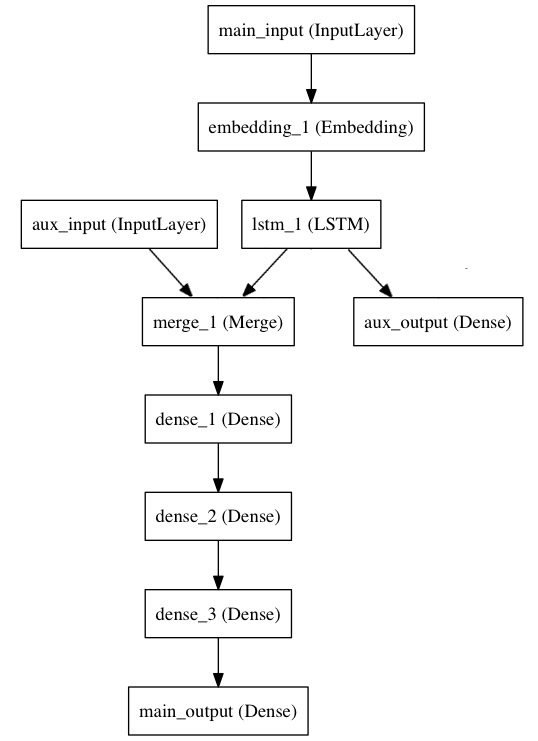

[Back to top](#top)

<a id='layers' ></a>
## keras层

### 常用层

常用层对应于core模块，core内部定义了一系列常用的网络层。

In [5]:
# 列出常用层
# dir(keras.layers.core)

1. Dense层
    - Dense就是常用的全连接层，所实现的运算是```output = activation(dot(input, kernel)+bias)```。其中activation是逐元素计算的激活函数，kernel是本层的权值矩阵，bias为偏置向量，只有当use_bias=True才会添加。  
    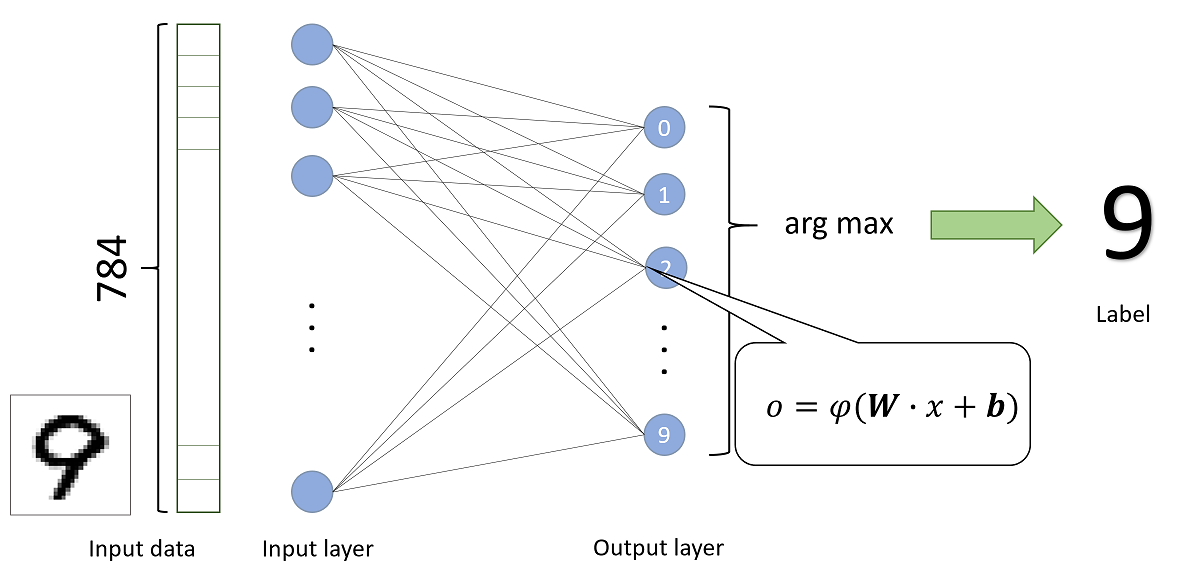
2. Activation层
    - 激活层对一个层的输出施加激活函数```softmax、elu、selu、softplus、softsign、relu、tanh、sigmoid、hard_sigmoid、linear```  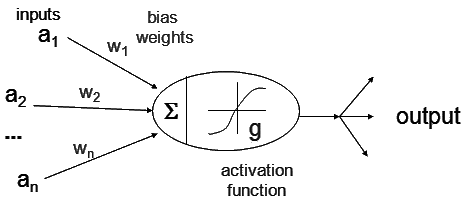
3. Dropout层
    - 为输入数据施加Dropout。Dropout将在训练过程中每次更新参数时按一定概率（rate）随机断开输入神经元，Dropout层用于防止过拟合。  
    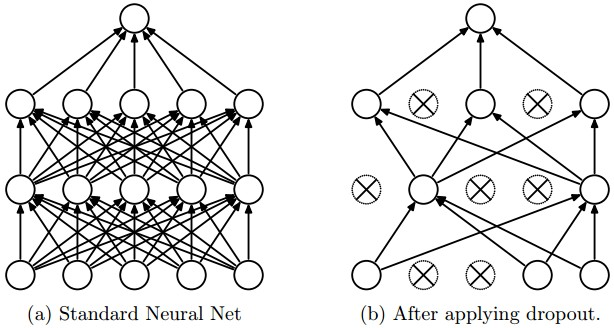
4. Flatten层
    - Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。
5. Reshape层
    - Reshape层用来将输入shape转换为特定的shape
6. Lambda层
    - 本函数用以对上一层的输出施以任何Theano/TensorFlow表达式

In [6]:
# 查看各个层的用法
keras.layers.core.Dense?
# keras.layers.core.Activation?
# keras.layers.core.Dropout?
# keras.layers.core.Flatten?
# keras.layers.core.Reshape?
# keras.layers.core.Lambda?

### 其它层
- 卷积层
    - 主要包括Conv1D，Conv2D，Conv3D，三者的区别就是对不同维度的数据进行卷积。
    - Conv1D 输入shape：形如```（samples，steps，input_dim）```的3D张量
    - Conv2D 输入形如```（samples，rows，cols，channels）```的4D张量
    - Conv3D 输入应为形如```（samples，input_dim1，input_dim2, input_dim3，channels）```的5D张量  
    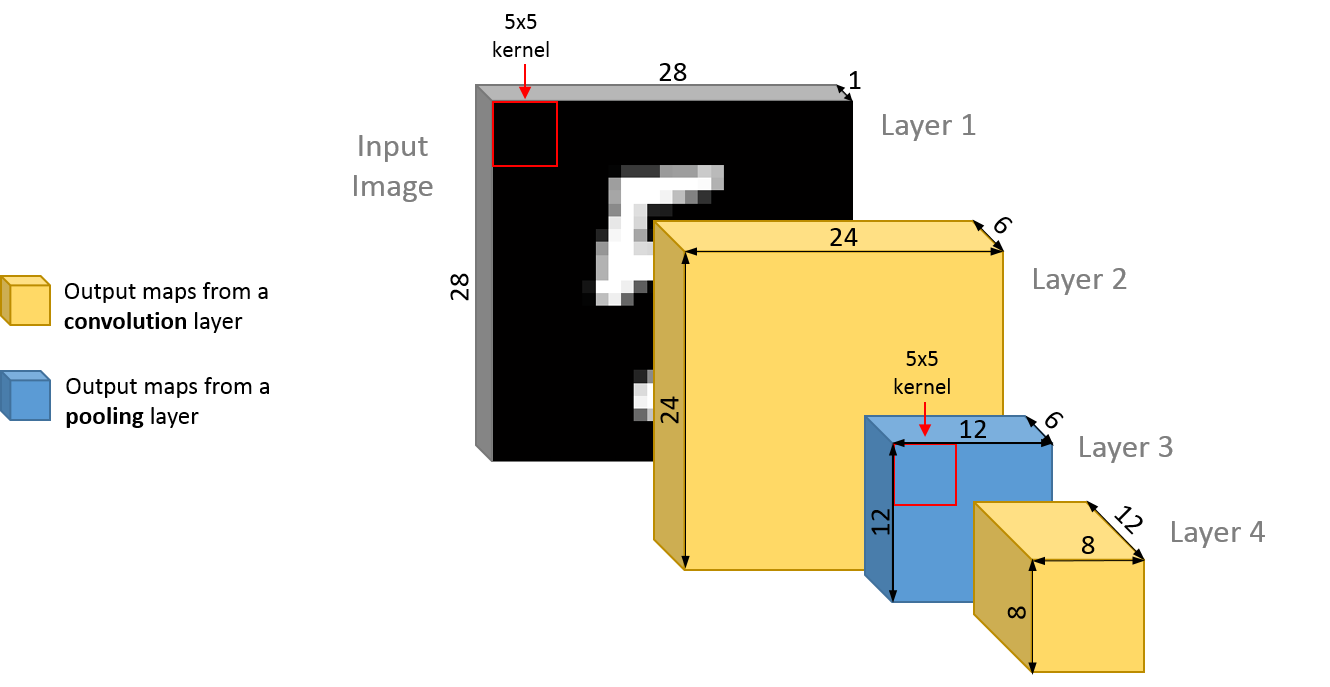
- 池化层
    - 主要用来下采样  
    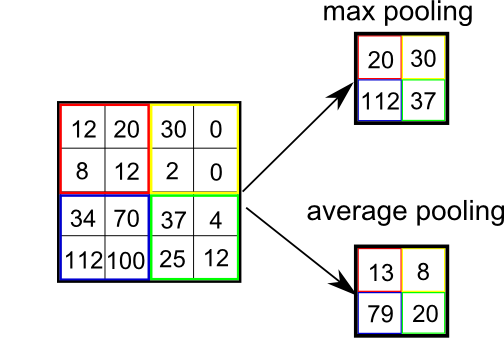
- 循环层
    - 用于循环神经网络  
    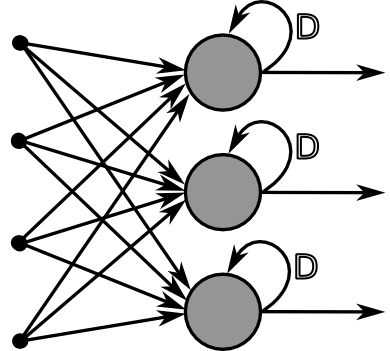
- 嵌入层
    - 借助word2vec来理解  
    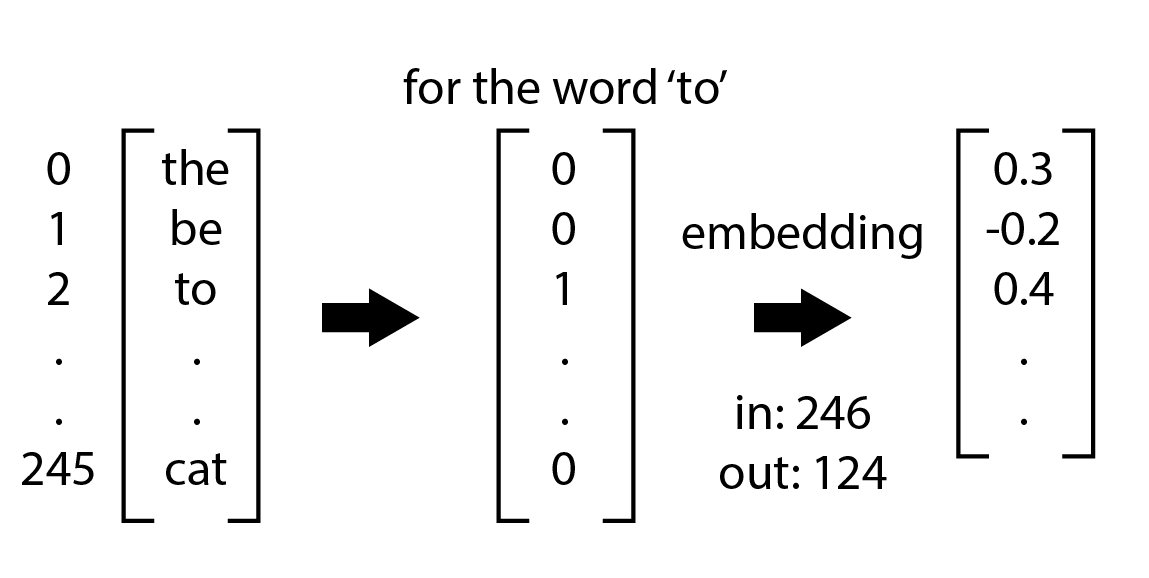
- 规范层
    - 在每个batch上将前一层的激活值重新规范化，即使得其输出数据的均值接近0，其标准差接近1  
    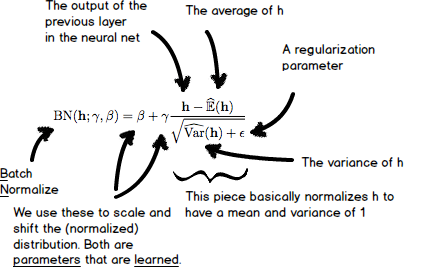

[Back to top](#top)

<a id='equipment' ></a>
## keras网络配置

模型网络构建完成后，我们需要对模型进行编译，模型编译必需的两个基本参数分别是loss函数和optimizer函数。  
```python
from keras import losses
model.compile(loss=losses.mean_squared_error, optimizer='sgd')
```

### 预定义loss函数：

[可用的目标函数](http://keras-cn.readthedocs.io/en/latest/other/objectives/)

### 优化器optimizers

[可用优化器](http://keras-cn.readthedocs.io/en/latest/other/optimizers/)  

[各种优化器的比较](http://blog.csdn.net/aliceyangxi1987/article/details/73210204)  
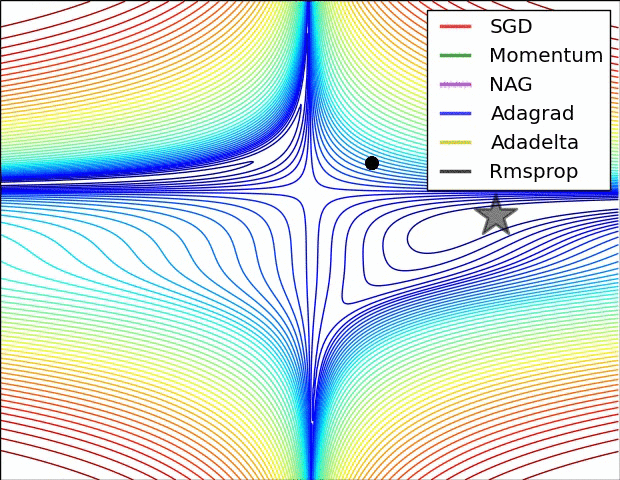

### 激活函数  

激活函数可以通过设置单独的激活层实现，也可以在构造层对象时通过传递activation参数实现。     
```python
from keras.layers import Activation, Dense

model.add(Dense(64))
model.add(Activation('tanh'))
```
**等价于**

```
model.add(Dense(64, activation='tanh'))
```

[可用激活函数](http://keras-cn.readthedocs.io/en/latest/other/activations/)  

[各激活函数的对比](https://zhuanlan.zhihu.com/p/22142013)

### 性能评估

性能评估模块提供了一系列用于模型性能评估的函数,这些函数在模型编译时由metrics关键字设置。

性能评估函数类似于目标函数, 但该性能的评估结果不会用于训练。

可以通过字符串来使用域定义的性能评估函数。  
```python
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae', 'acc'])
```
也可以自己定义评估函数。  



### 初始化方法
初始化方法定义了对Keras层设置初始化权重的方法。  

不同的层可能使用不同的关键字来传递初始化方法，一般来说指定初始化方法的关键字是**kernel_initializer** 和**bias_initializer**.

```python
model.add(Dense(64,
                kernel_initializer='random_uniform',
                bias_initializer='zeros'))
```  
[常用初始化方法](http://keras-cn.readthedocs.io/en/latest/other/initializations/)

**正则化**  

正则项在优化过程中层的参数或层的激活值添加惩罚项，这些惩罚项将与损失函数一起作为网络的最终优化目标。  

这些层有三个关键字参数以施加正则项：  

- **kernel_regularizer**：施加在权重上的正则项
- **bias_regularizer**：施加在偏置向量上的正则项
- **activity_regularizer**：施加在输出上的正则项

```python
from keras import regularizers
model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
                ```

[Back to top](#top)

<a id='pretrain' ></a>
## keras预训练模型应用
Kera的应用模块Application提供了带有预训练权重的Keras模型，这些模型可以用来进行预测、特征提取和finetune。    

模型的预训练权重将下载到~/.keras/models/并在载入模型时自动载入。  

应用于图像分类的模型,权重训练自ImageNet： 包括  ```Xception VGG16 VGG19 ResNet50 InceptionV3 MobileNet``` 等。  

[预训练模型的使用](http://keras-cn.readthedocs.io/en/latest/other/application/)

In [7]:
dir(keras.applications)

['InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'ResNet50',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'resnet50',
 'vgg16',
 'vgg19',
 'xception']

[Back to top](#top)

<a id='dataset' ></a>
## keras常用数据库  
keras 整合了部分经典的数据集，可以直接调用。  

[keras dataset](http://keras-cn.readthedocs.io/en/latest/other/datasets/)  

```python
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

In [8]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'boston_housing',
 'cifar',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

[Back to top](#top)

<a id='visualization' ></a>
## keras可视化  

**keras.utils.vis_utils**模块提供了画出Keras模型的函数（必须安装pydot-ng和graphviz）  

```python
from keras.utils import plot_model
plot_model(model, to_file='model.png')
```


In [9]:
# dir(keras.utils.vis_utils)

[Back to top](#top)

<a id='Exercise' ></a>
## Keras 练习

### Sequential模型

In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [11]:
# 设置基本参数
batch_size = 128
num_classes = 10
epochs = 8
# 定义图片大小
img_rows, img_cols = 28, 28

In [12]:
# 加载mnist数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

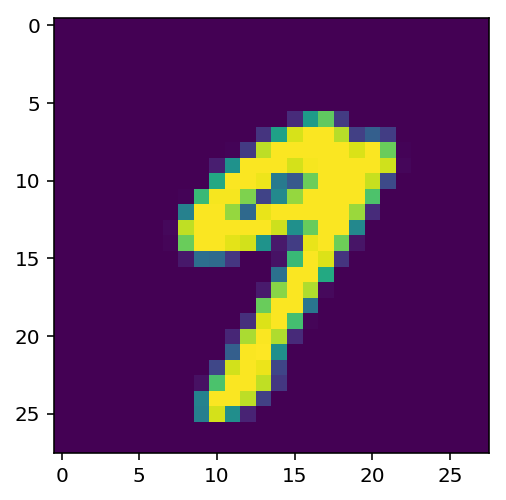

In [14]:
plt.imshow(x_test[20]);

In [15]:
print('there are {} training samples and {} testing samples.'.format(x_train.shape[0], x_test.shape[0]))
print('the size of training samples is {} and the size of testing samples is {}.'.format(x_train.shape, x_test.shape))

there are 60000 training samples and 10000 testing samples.
the size of training samples is (60000, 28, 28) and the size of testing samples is (10000, 28, 28).


In [16]:
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:100]
y_test = y_test[:100]

In [17]:
# 将数据集的格式转换为
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [18]:
# 特征缩放
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1000, 28, 28, 1)
1000 train samples
100 test samples


In [19]:
y_test[0]

7

In [20]:
# 独热编码
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(48, (3, 3), activation='elu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/8
800/800 [==============================] - 5s 7ms/step - loss: 2.0954 - acc: 0.3737 - val_loss: 1.5955 - val_acc: 0.5950
Epoch 2/8
800/800 [==============================] - 5s 6ms/step - loss: 1.3040 - acc: 0.6088 - val_loss: 1.0991 - val_acc: 0.5850
Epoch 3/8
800/800 [==============================] - 5s 6ms/step - loss: 0.7991 - acc: 0.7650 - val_loss: 0.6363 - val_acc: 0.8050
Epoch 4/8
800/800 [==============================] - 5s 6ms/step - loss: 0.6043 - acc: 0.8075 - val_loss: 0.7798 - val_acc: 0.7600
Epoch 5/8
800/800 [==============================] - 5s 6ms/step - loss: 0.4287 - acc: 0.8813 - val_loss: 0.6340 - val_acc: 0.7950
Epoch 6/8
800/800 [==============================] - 5s 6ms/step - loss: 0.4100 - acc: 0.8650 - val_loss: 0.7535 - val_acc: 0.7700
Epoch 7/8
800/800 [==============================] - 5s 6ms/step - loss: 0.3231 - acc: 0.9050 - val_loss: 0.4780 - val_acc: 0.8500
Epoch 8/8
800/800 [==================

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.269826843739
Test accuracy: 0.89


In [24]:
predictions = model.predict_classes(x_test)

100/100 [==============================] - 0s 3ms/step


In [25]:
predictions[20]

9

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 48)        13872     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        27712     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               991360    
__________

In [27]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

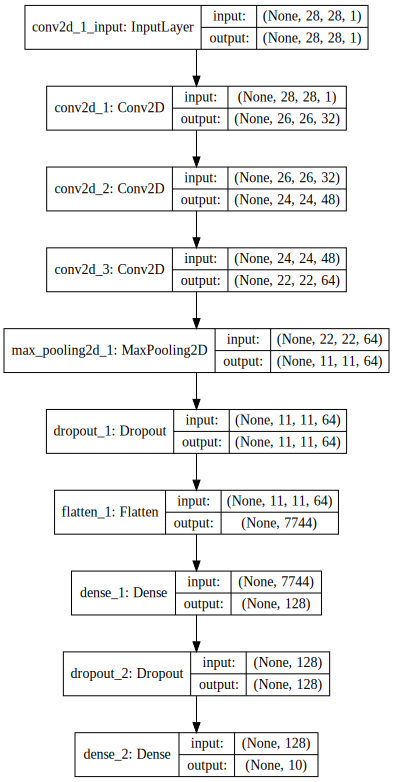

In [28]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [29]:
# 保存模型 
model.save('mnist.h5')

**课堂练手**  
在以上模型基础上进行改进或自己构建一个模型。

### Model模型

In [30]:
(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()
n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

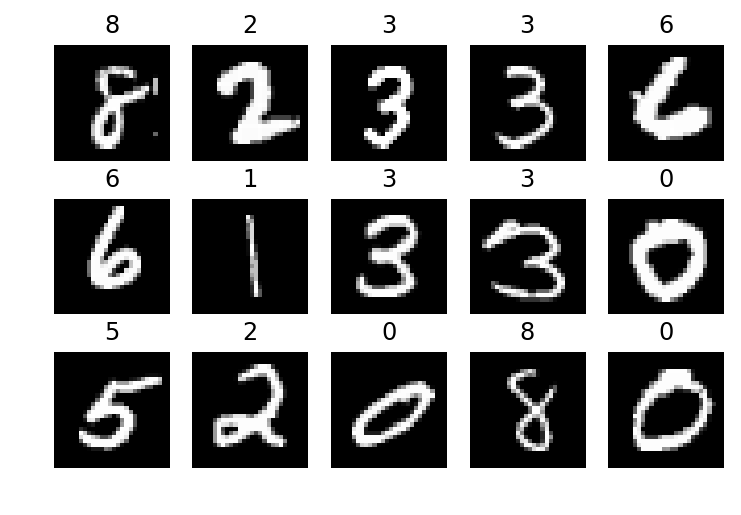

In [31]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

In [32]:
import numpy as np
import random

n_class, n_len, width, height = 10, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for i in range(X_len):
        for j in range(n_len):  
            index = random.randint(0, X_len-1)
            X_gen[i,:,j*width:(j+1)*width, 0] = X[index]
            y_gen[j][i][y[index]] = 1
    
    return X_gen, y_gen

In [33]:
X_raw_gen, y_raw_gen = generate_dataset(X_raw, y_raw)
X_raw_test_gen, y_raw_test_gen = generate_dataset(X_raw_test, y_raw_test)

In [34]:
y_raw_gen = np.array(y_raw_gen)
y_raw_test_gen = np.array(y_raw_test_gen)

In [35]:
X_train, y_train = X_raw_gen[:10000], y_raw_gen[:, :10000, :]

X_test, y_test = X_raw_test_gen[:1000], y_raw_test_gen[:, :1000, :]

In [36]:
y_train = list(y_train)
y_test = list(y_test)

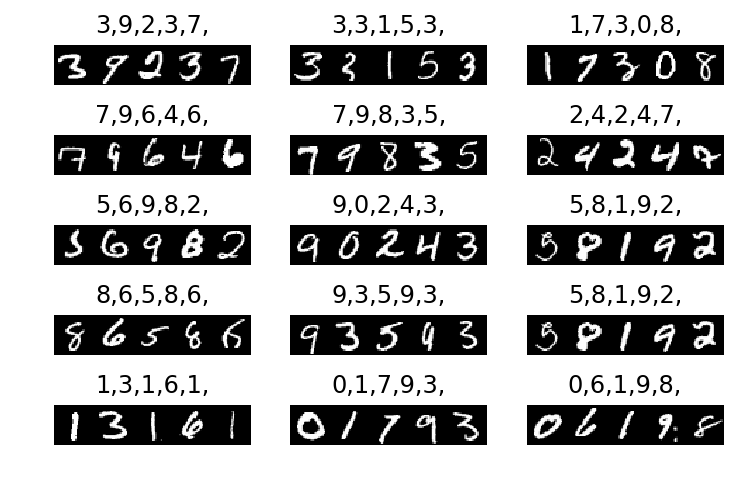

In [37]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, X_test.shape[0]-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

In [38]:

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers import Input, Dense

# TODO: 构建你的模型
def train_model(X_train, y_train):
    main_input = Input(shape=(28, 140, 1))
    batch_size = 128
    num_classes = 10
    epochs = 6
    # creat some layers for the model
    layer = Conv2D(16, kernel_size=(3, 3), activation="relu")(main_input)
    layer = Conv2D(32, kernel_size=(3, 3), activation="relu", )(layer)
    layer = Conv2D(64, kernel_size=(3, 3), activation="relu", )(layer)
    layer = Conv2D(64, kernel_size=(3, 3), activation="relu", )(layer)
    layer = MaxPooling2D(pool_size=(2, 2))(layer)
    layer = Dropout(0.2)(layer)
    layer = Flatten()(layer)
    layer = Dense(512, activation="relu")(layer)
    layer = Dropout(0.4)(layer)
    # 分别训练5个数字
    output = [Dense(10, activation='softmax')(layer) for i in range(n_len)]
    # 使用泛型输出5个数字的序列
    model = Model(inputs=main_input, outputs=output)
    model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)
    return model
model = train_model(X_train, y_train)

Train on 8000 samples, validate on 2000 samples
Epoch 1/6
8000/8000 [==============================] - 383s 48ms/step - loss: 28.0236 - dense_4_loss: 5.5624 - dense_5_loss: 5.6411 - dense_6_loss: 5.4477 - dense_7_loss: 5.6689 - dense_8_loss: 5.7034 - dense_4_acc: 0.4274 - dense_5_acc: 0.4237 - dense_6_acc: 0.4350 - dense_7_acc: 0.4249 - dense_8_acc: 0.4095 - val_loss: 2.3784 - val_dense_4_loss: 0.4367 - val_dense_5_loss: 0.4706 - val_dense_6_loss: 0.4369 - val_dense_7_loss: 0.5631 - val_dense_8_loss: 0.4711 - val_dense_4_acc: 0.8645 - val_dense_5_acc: 0.8580 - val_dense_6_acc: 0.8690 - val_dense_7_acc: 0.8100 - val_dense_8_acc: 0.8500
Epoch 2/6
8000/8000 [==============================] - 362s 45ms/step - loss: 2.0973 - dense_4_loss: 0.4252 - dense_5_loss: 0.4249 - dense_6_loss: 0.4227 - dense_7_loss: 0.4087 - dense_8_loss: 0.4158 - dense_4_acc: 0.8664 - dense_5_acc: 0.8690 - dense_6_acc: 0.8636 - dense_7_acc: 0.8710 - dense_8_acc: 0.8681 - val_loss: 1.0230 - val_dense_4_loss: 0.2089 -

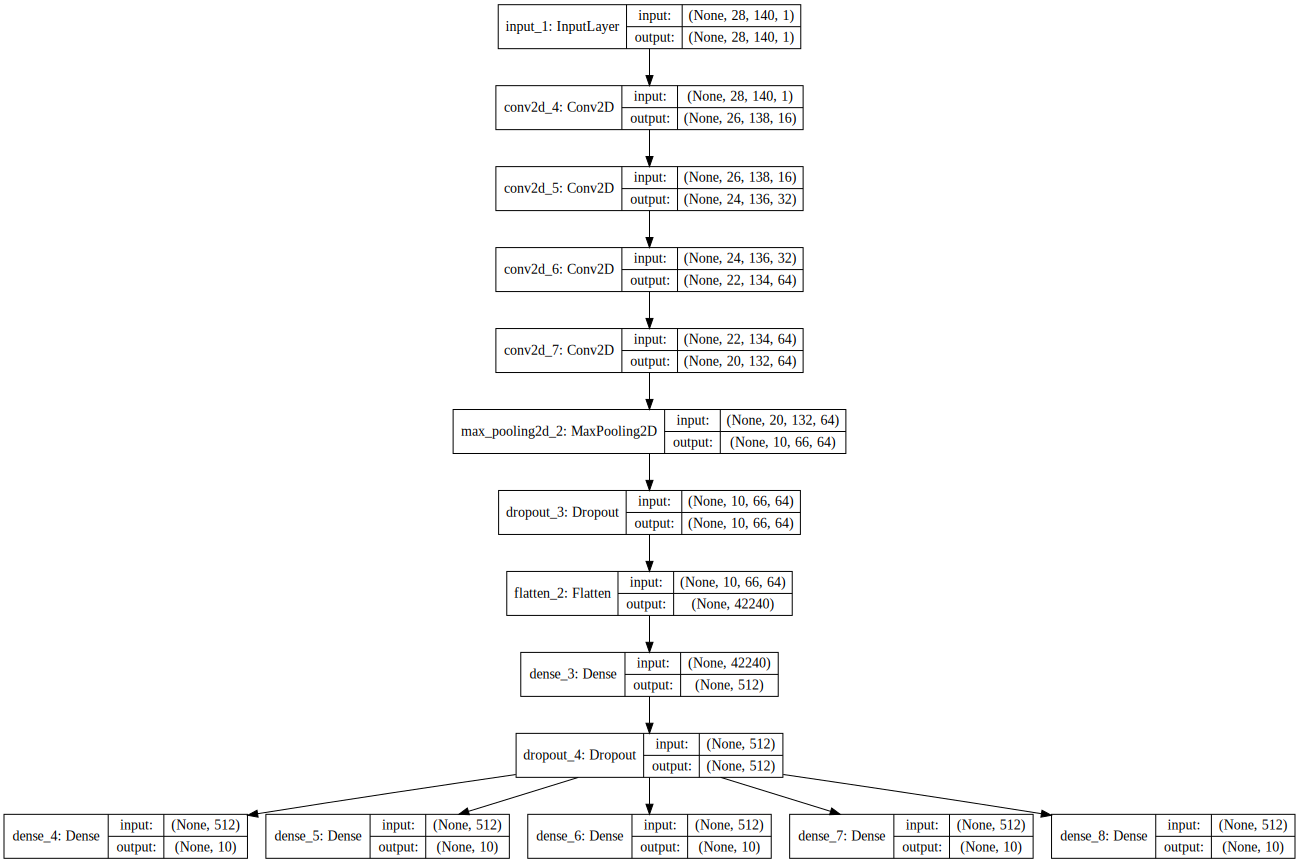

In [39]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [40]:
# 测试模型
y_pred = model.predict(X_test)

In [41]:
def evaluate(model):
    # 按照错一个就算错的规则计算准确率
    right = 0
    wrong = 0
    for i in range (100):
        right_num = 0
        for j in range(5):
            y_pred_num = np.argmax(y_pred[j][i])
            y_test_num = np.argmax(y_test[j][i])
            if y_pred_num == y_test_num:
                right_num += 1
        if right_num == 5:
            right += 1
        else:
            wrong += 1
    
    return right/100.0

evaluate(model)

0.87

In [42]:
# 保存模型
model.save('model.h5')